In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("winequality-red.csv",sep=";")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


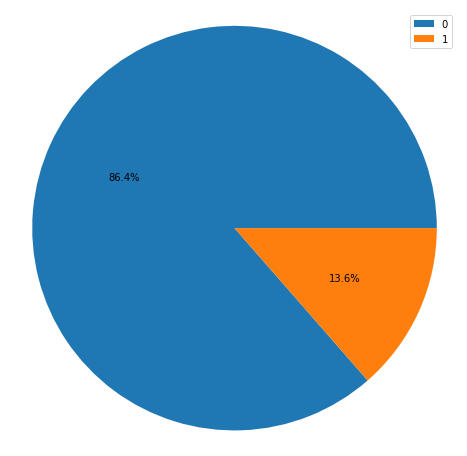

The good quality wines count for  13.57 %


In [33]:
df["grade"]=1 #good
df["grade"][df.quality<7]=0 #bad
plt.figure(figsize=(8,8))
labels=df["grade"].value_counts().index
plt.pie(df["grade"].value_counts(),autopct="%1.1f%%")
plt.legend(labels,loc="best")
plt.axis('equal')
plt.show()
print("The good quality wines count for ",round(df["grade"].value_counts(normalize=True)[1]*100,2),"%")

In [18]:
labels

Int64Index([0, 1], dtype='int64')

In [16]:
labels

RangeIndex(start=0, stop=1599, step=1)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore

In [36]:
df.shape

(1599, 13)

In [38]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [39]:
df_new.shape

(1451, 13)

In [40]:
x=df_new.iloc[:,:-2]
y=df_new.iloc[:,-2]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [43]:
dtc=DecisionTreeClassifier()

In [44]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
dtc.score(x_train,y_train)

1.0

In [46]:
predtc=dtc.predict(x_test)

In [47]:
accuracy_score(y_test,predtc)

0.6367432150313153

In [52]:
res=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')

In [53]:
res.std()

0.019923548114567636

In [54]:
res.mean()

0.4631956153415321